# Perceptron from scratch

Pereceptron is the simplest artificial neural network architectures. It's mainly used for binary classification.

![SNOWFALL](perceptron.png)

Weighted Sum
$$
z(x_1, x_2) = w_1 x_1 + w_2 x_2 + b
$$

Activation using Sigmoid (make the predictions as probabilty)
$$
a(z) = \frac{1}{1 + e^{-z}}
$$

Log Loss, Logistic Loss or Cross-Entropy Loss
$$
\mathcal{L}(y, a) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log a^{(i)} + \left(1 - y^{(i)}\right) \log \left(1 - a^{(i)}\right) \right]
$$

---
Gradient descent

$$
w_1 \leftarrow w_1 - \alpha \, \frac{\partial \mathcal{L}}{\partial w_1}
$$

$$
w_2 \leftarrow w_2 - \alpha \, \frac{\partial \mathcal{L}}{\partial w_2}
$$

$$
b \leftarrow b - \alpha \, \frac{\partial \mathcal{L}}{\partial b}
$$

---
Gradients formula
$$
\frac{\partial \mathcal{L}}{\partial w_1} = \frac{1}{m} \sum_{i=1}^{m} \left(a^{(i)} - y^{(i)}\right) x_1^{(i)}
$$

$$
\frac{\partial \mathcal{L}}{\partial w_2} = \frac{1}{m} \sum_{i=1}^{m} \left(a^{(i)} - y^{(i)}\right) x_2^{(i)}
$$

$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left(a^{(i)} - y^{(i)}\right)
$$

---
To find the equation above just use basic calculus
$$
\frac{\partial \mathcal{L}}{\partial w} = \frac{\partial \mathcal{L}}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w}
$$

## Without Vectorization

### Define functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def z(w1,w2,x1,x2,b):
    return w1*x1 + w2*x2 + b
    

In [3]:
def a(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def L(y,a):
    return y * np.log(a) + (1 - y) *  np.log(1 - a)

In [5]:
def gw1(y,a,x1):
    return (a - y) * x1

In [6]:
def gw2(y,a,x2):
    return (a - y) * x2

In [7]:
def gb(y,a):
    return a - y

### Training

In [8]:
# create a small data
from sklearn.datasets import make_blobs

X,y = make_blobs(50,2,centers=2,random_state=3)

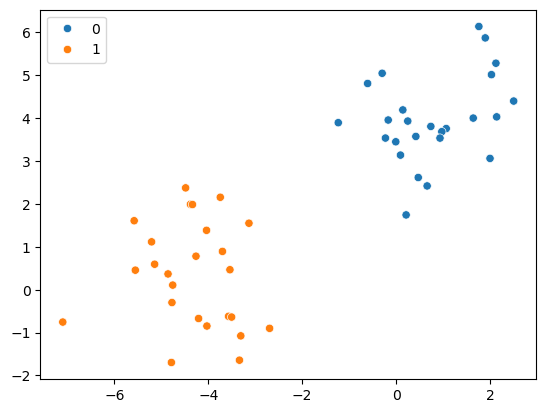

In [9]:
import seaborn as sns
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

In [10]:
# Max iteration
ite = 1000

i = 0
w1,w2,b = 1,1,1 # Initialisation
alpha = 0.01
loss_ = 9999
while i<ite:
    m = len(y)
    loss, gradw1 , gradw2, gradb = 0,0,0,0
    for j in range(m):
        z_ = z(w1,w2,X[j,0],X[j,1],b)
        a_ = a(z_)
        loss += L(y[j],a_)
        gradw1 += gw1(y[j],a_,X[j,0])
        gradw2 += gw2(y[j],a_,X[j,1])
        gradb += gb(y[j],a_)

    loss = -(1/m) * loss
    gradw1 = (1/m) * gradw1
    gradw2 = (1/m) * gradw2
    gradb = (1/m) * gradb

    # Upadating the weights
    w1 = w1 - alpha * gradw1
    w2 = w2 - alpha * gradw2
    b = b - alpha * gradb

    print("Loss: ", loss)
    print('='* 20)
    if (np.abs(loss_ - loss) < 0.001):
        print("There is no big improvement")
        break
    loss_ = loss
    i = i + 1

Loss:  4.411182682962043
Loss:  4.320856269922599
Loss:  4.230982347513774
Loss:  4.141586638537614
Loss:  4.052695964012147
Loss:  3.9643382351340852
Loss:  3.8765424349908684
Loss:  3.7893385885977198
Loss:  3.702757719843254
Loss:  3.6168317939965107
Loss:  3.531593644567262
Loss:  3.447076883535889
Loss:  3.363315794283626
Loss:  3.280345206965088
Loss:  3.1982003565693753
Loss:  3.11691672450461
Loss:  3.036529865194808
Loss:  2.9570752198700387
Loss:  2.8785879204249563
Loss:  2.801102586872724
Loss:  2.7246531224847854
Loss:  2.649272511132673
Loss:  2.574992621594163
Loss:  2.5018440236185806
Loss:  2.429855820346831
Loss:  2.3590555012505057
Loss:  2.2894688191106307
Loss:  2.221119693738384
Loss:  2.1540301441996665
Loss:  2.0882202503024985
Loss:  2.0237081430999506
Loss:  1.960510023201193
Loss:  1.898640204802636
Loss:  1.8381111825638285
Loss:  1.7789337177539466
Loss:  1.721116939467224
Loss:  1.6646684561299168
Loss:  1.6095944719874502
Loss:  1.5558999027783955
Loss:  

In [11]:
# get our best parameters
print("w1 = ",w1)
print("w2 = ",w2)
print("b = ",b)

w1 =  -0.4470438810825929
w2 =  -0.6045953588211573
b =  0.8229615517976154


### Decision boundary

$$
\text{Decision boundary}\;\Longleftrightarrow\;a = 0.5
\;\Longleftrightarrow\;z = 0
\;\Longleftrightarrow\;w_{1}x_{1} + w_{2}x_{2} + b = 0
$$
so we have a line equation

In [12]:
x_ = np.array([X[:,0].min(),X[:,0].max()])
y_ = -(b + x_ * w1)/w2

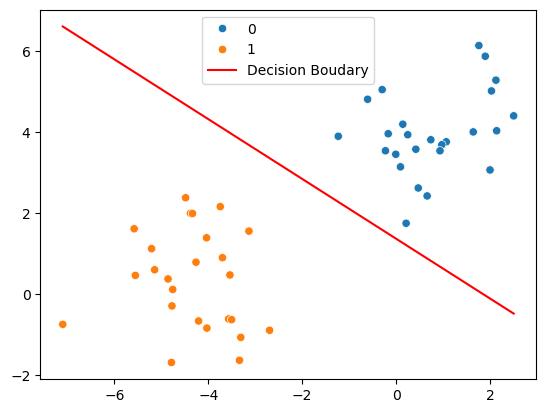

In [13]:
import seaborn as sns
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.plot(x_, y_, '-r', label='Decision Boudary')
plt.legend()
plt.show()

### Test

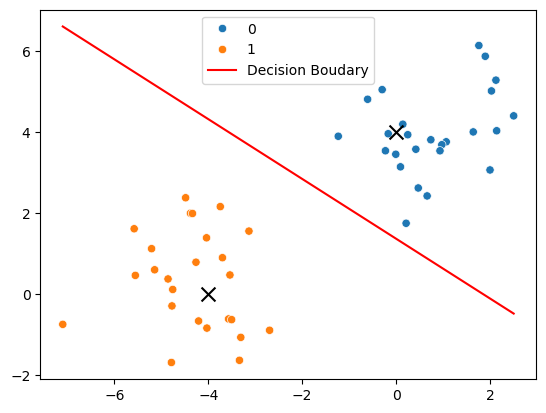

In [14]:
# new point
x_test_1 = [-4,0]
x_test_0 = [0,4]
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.plot(x_, y_, '-r', label='Decision Boudary')
plt.scatter(x_test_1[0],x_test_1[1],marker="x",c="black",s=100)
plt.scatter(x_test_0[0],x_test_0[1],marker="x",c="black",s=100)
plt.legend()
plt.show()

In [15]:
# let's test it
def predict(x):
    pred_z = w1 * x[0] + w2 * x[1] + b
    pred_activation = a(pred_z)
    # if activation > 0.5 => 1 if not =>0
    if(pred_activation > 0.5):
        print(f"label {1} ({pred_activation:.2%})")
    else:
        print(f"label {0} ({1 - pred_activation:.2%})")

predict(x_test_1)
predict(x_test_0)

label 1 (93.16%)
label 0 (83.14%)


## With Vectorization

Vectorization is a technique used to speed up code execution by eliminating explicit loops and instead performing operations on entire arrays or vectors at once, such as dot products.
It also makes it easier to extend your code to handle more dimensions — for example, if you want to add a third feature x3, you would normally need to define additional variables like w3 and calculate the new gradient grad3. With vectorization, adding extra dimensions requires minimal changes, tou will see that in the next section. 

**Z vectorisation**
$$
Z = X W + b
$$

$$
X = \begin{bmatrix}
x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
\end{bmatrix} \in \mathbb{R}^{m \times n}, \quad
W = \begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix} \in \mathbb{R}^{n \times 1}, \quad
b \in \mathbb{R}
$$
$$
m = \text{number of samples},\quad
n = \text{number of features},\quad
X = \text{input matrix}, \quad
W = \text{weight vector}, \quad
b = \text{bias scalar}
$$

To see why, just develop the equation above and you will find that basicaly calculate z for each sample of data
$$
Z = \begin{bmatrix}
z^{(1)} \\
z^{(2)} \\
\vdots \\
z^{(m)}
\end{bmatrix}=
\begin{bmatrix}
w_1 x_1^{(1)} + w_2 x_2^{(1)} + \cdots + w_n x_n^{(1)} + b \\
w_1 x_1^{(2)} + w_2 x_2^{(2)} + \cdots + w_n x_n^{(2)} + b \\
\vdots \\
w_1 x_1^{(m)} + w_2 x_2^{(m)} + \cdots + w_n x_n^{(m)} + b
\end{bmatrix}
$$


---
**A vectorisation**

$$
A = \sigma(Z) =
\begin{bmatrix}
\sigma(z^{(1)}) \\
\sigma(z^{(2)}) \\
\vdots \\
\sigma(z^{(m)})
\end{bmatrix}=
\begin{bmatrix}
a^{(1)} \\
a^{(2)} \\
\vdots \\
a^{(m)}
\end{bmatrix}
$$


---
**Loss vectorisation**
$$
\mathcal{L} = -\frac{1}{m} \sum \left[ y \log A + \left(1 - y\right) \log \left(1 - A\right) \right]
$$
$$
y = \text{array that have the classes (0 and 1) for each point}
$$

---
**Gradients vectorisation**
$$
\frac{\partial \mathcal{L}}{\partial W} = \frac{1}{m} X^\top (A - y)
$$
$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{m} \sum (A - y)
$$

$$
W = W - \alpha \frac{\partial \mathcal{L}}{\partial W}
\quad , \quad
b = b - \alpha \frac{\partial \mathcal{L}}{\partial b}
$$


### Define functions

In [16]:
def Z(X,W,b):
    return np.dot(X,W) + b

In [17]:
def A(Z):
    return 1 / (1 + np.exp(-Z))

In [18]:
def Loss(y,A):
    m = len(y)
    epsilon = 1e-15
    A = np.clip(A, epsilon, 1 - epsilon) # Force to stay in [epsilon , 1 - epsilon] interval
                                         # due to calculation A can have 0 as value and that generate prob log(0) = -inf
    return - (1/m) * np.sum(y*np.log(A) + (1-y) * np.log(1 - A))

In [19]:
def gradw(X,A,y):
    m = len(y)
    return (1/m) * np.dot(X.T ,(A-y))

def gradb(A,y):
    m = len(y)
    return (1/m) * np.sum(A-y)

### Dataset

In [20]:
# create a small data
from sklearn.datasets import make_blobs

X,y = make_blobs(200,2,centers=2,random_state=7)

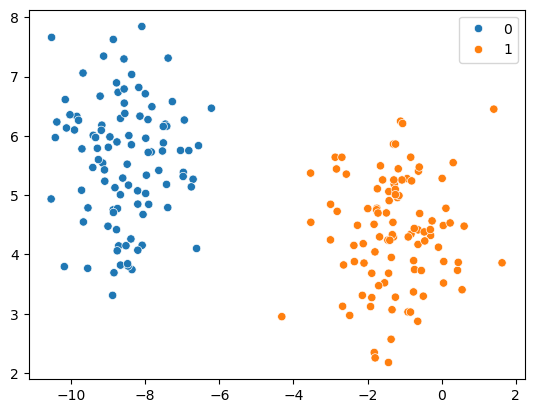

In [21]:
import seaborn as sns
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

### training

In [22]:
def train(X,y,alpha = 0.01,it_max = 100):
    # initialiser W & b
    W = np.ones(X.shape[1])
    b = 1
    # loss
    loss_ = 99999
    
    i = 0
    while(i < ite):
        # forward
        Z_ = Z(X,W,b)
        A_ = A(Z_)
    
        #loss
        L_ = Loss(y,A_)
    
        #Gradient descent
        gradw_ = gradw(X,A_,y)
        gradb_ = gradb(A_,y)
        
        W = W - alpha * gradw_
        b = b - alpha * gradb_
    
        print(f"Loss: {L_}")
        print("="*25)
        i = i + 1
        
    return W , b

In [23]:
W,b = train(X,y)

Loss: 0.14400326275620148
Loss: 0.1364199428605979
Loss: 0.12977937119374366
Loss: 0.12393568898634459
Loss: 0.11876955949187518
Loss: 0.11418273399892542
Loss: 0.11009383336298627
Loss: 0.10643505559139453
Loss: 0.1031495917374536
Loss: 0.10018958605672433
Loss: 0.09751451648026203
Loss: 0.09508990140686471
Loss: 0.09288626121692627
Loss: 0.0908782797127871
Loss: 0.08904412333899504
Loss: 0.08736488559707936
Loss: 0.08582413132967082
Loss: 0.08440752108815425
Loss: 0.08310250004525749
Loss: 0.08189803918675517
Loss: 0.08078441905103365
Loss: 0.07975304825795455
Loss: 0.07879631061142447
Loss: 0.07790743577281767
Loss: 0.07708038946015272
Loss: 0.07630977988783393
Loss: 0.07559077776747045
Loss: 0.07491904767521708
Loss: 0.07429068898100841
Loss: 0.07370218484991621
Loss: 0.07315035808114084
Loss: 0.07263233275795042
Loss: 0.07214550085168582
Loss: 0.07168749306222645
Loss: 0.07125615329196194
Loss: 0.0708495162450261
Loss: 0.07046578772205629
Loss: 0.07010332724603209
Loss: 0.06976063

### Testing

In [24]:
# two point as 0
# two point as 1
X_test = np.array([[-2,4],
              [1,3],
              [-9,6],
              [-8,4]])
y_test = np.array([1,1,0,0])

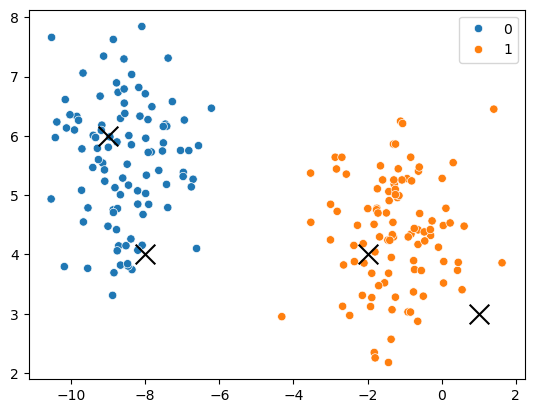

In [25]:
import seaborn as sns
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
for i in X_test:
    plt.scatter(i[0],i[1],marker="x",c="black",s=200)
plt.show()

In [26]:
def predict(X,W,b):
    Z_ = Z(X,W,b)
    A_ = A(Z_) 
    return A_
res = predict(X_test,W,b)
print(res)

[0.93665318 0.99739583 0.00511058 0.00236591]


In [27]:
pred_label = [1 if i > 0.5 else 0 for i in res]
print("Predicted: ",pred_label)
print("Real: ",y_test)

Predicted:  [1, 1, 0, 0]
Real:  [1 1 0 0]


### higher dimension (3D)

In [28]:
# create a small data
from sklearn.datasets import make_blobs

X,y = make_blobs(200,3,centers=2,random_state=42)

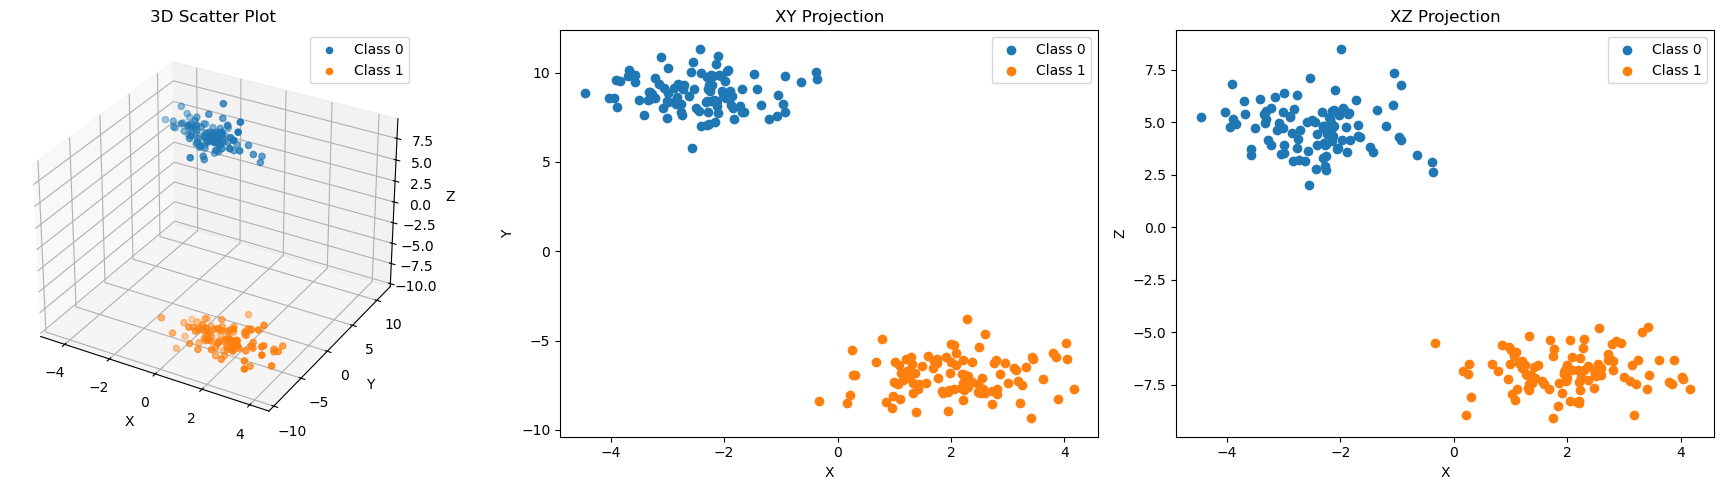

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

unique_labels = [0,1]

fig = plt.figure(figsize=(18, 5))

# 3D Plot
ax1 = fig.add_subplot(131, projection='3d')
for l in unique_labels:
    indices = (y == l)
    ax1.scatter(X[indices, 0], X[indices, 1], X[indices, 2], label=f'Class {l}')
ax1.set_title("3D Scatter Plot")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.legend()

# XY Projection
ax2 = fig.add_subplot(132)
for l in unique_labels:
    indices = (y == l)
    ax2.scatter(X[indices, 0], X[indices, 1], label=f'Class {l}')
ax2.set_title("XY Projection")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.legend()

# XZ Projection
ax3 = fig.add_subplot(133)
for l in unique_labels:
    indices = (y == l)
    ax3.scatter(X[indices, 0], X[indices, 2], label=f'Class {l}')
ax3.set_title("XZ Projection")
ax3.set_xlabel("X")
ax3.set_ylabel("Z")
ax3.legend()

plt.tight_layout()
plt.show()


As you will see we will not need to add anything in our code even if the dimesions change.
That is one of the plus of using vectorisation.

### Train

In [30]:
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [31]:
W,b = train(X,y)

Loss: 11.458332727947392
Loss: 10.448447751664313
Loss: 9.438754520993859
Loss: 8.429533961423969
Loss: 7.421486990229995
Loss: 6.416359991084934
Loss: 5.418435949342429
Loss: 4.437763964308264
Loss: 3.49578849822732
Loss: 2.6309687967446123
Loss: 1.8949314399300283
Loss: 1.3289568359084099
Loss: 0.9346460692598925
Loss: 0.6758139821589856
Loss: 0.5076804916858392
Loss: 0.39602631530459376
Loss: 0.31922577742535074
Loss: 0.2644145323786458
Loss: 0.22394627616340074
Loss: 0.19316663824939181
Loss: 0.16915020146319457
Loss: 0.14999631715764178
Loss: 0.13443080939468185
Loss: 0.12157470431796892
Loss: 0.11080587750808346
Loss: 0.10167378178174108
Loss: 0.0938453806307937
Loss: 0.08706995507764351
Loss: 0.08115563710931112
Loss: 0.07595341448945922
Loss: 0.07134600752644389
Loss: 0.06723999124330893
Loss: 0.0635601221917008
Loss: 0.060245190087655894
Loss: 0.05724494166060825
Loss: 0.0545177700233908
Loss: 0.05202895833142863
Loss: 0.049749330035011745
Loss: 0.04765420099793406
Loss: 0.045

In [32]:
# now we have three weights
print(W.shape)

(3,)


### Test

In [33]:
# two 0 & two 1
X_test = np.array([[2,-7,-7],
                   [4,-5,-4],
                   [-4,10,5],
                   [0,7,7]])
y_test = np.array([1,1,0,0])

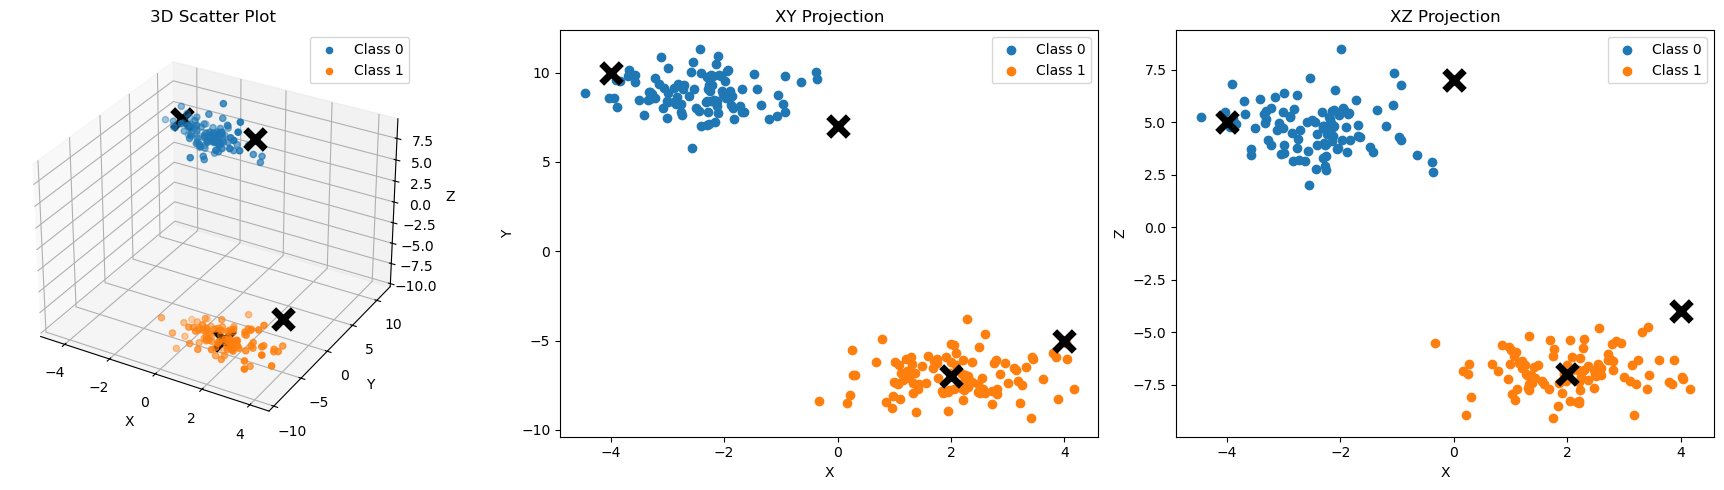

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np



fig = plt.figure(figsize=(18, 5))

# 3D Plot
ax1 = fig.add_subplot(131, projection='3d')
for l in unique_labels:
    indices = (y == l)
    ax1.scatter(X[indices, 0], X[indices, 1], X[indices, 2], label=f'Class {l}')
for i in X_test:
    ax1.scatter(i[0], i[1], i[2],c="black",marker="x",s=200,linewidths=5)
ax1.set_title("3D Scatter Plot")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.legend()

# XY Projection
ax2 = fig.add_subplot(132)
for l in unique_labels:
    indices = (y == l)
    ax2.scatter(X[indices, 0], X[indices, 1], label=f'Class {l}')
for i in X_test:
    ax2.scatter(i[0], i[1],c="black",s=200,marker="x",linewidths=5)
ax2.set_title("XY Projection")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.legend()

# XZ Projection
ax3 = fig.add_subplot(133)
for l in unique_labels:
    indices = (y == l)
    ax3.scatter(X[indices, 0], X[indices, 2], label=f'Class {l}')
for i in X_test:
    ax3.scatter(i[0], i[2],c="black",s=200,marker="x",linewidths=5)
ax3.set_title("XZ Projection")
ax3.set_xlabel("X")
ax3.set_ylabel("Z")
ax3.legend()

plt.tight_layout()
plt.show()


In [35]:
np.set_printoptions(suppress=True, precision=6)
res = predict(X_test,W,b)
print(res)

[0.999635 0.999914 0.000042 0.038116]


In [36]:
pred_label = [1 if i > 0.5 else 0 for i in res]
print("Predicted: ",pred_label)
print("Real: ",y_test)

Predicted:  [1, 1, 0, 0]
Real:  [1 1 0 0]


### Decision boundary in 3d

the boundry here will be a Plane .

$$
\text{Decision boundary}\;\Longleftrightarrow\;a = 0.5
\;\Longleftrightarrow\;z = 0
\;\Longleftrightarrow\;w_{1}x_{1} + w_{2}x_{2} +  w_{3}x_{3} + b = 0
$$

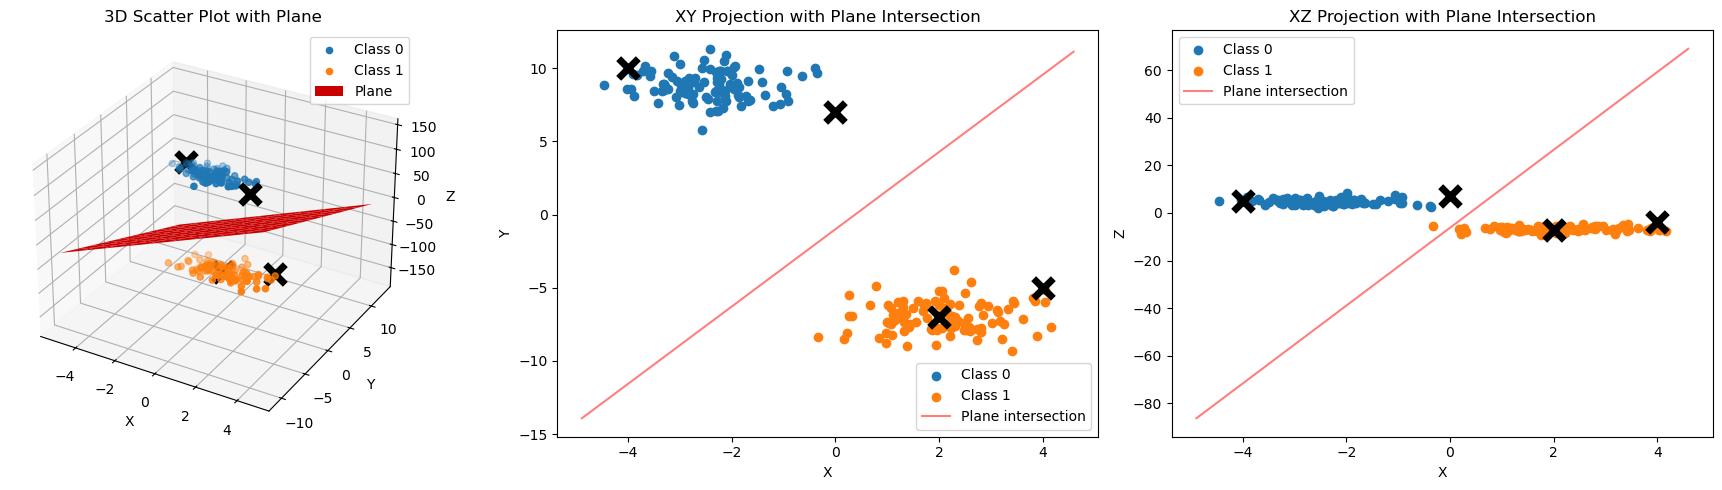

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

a, b, c = W
d = b
fig = plt.figure(figsize=(18, 5))

# 3D Plot
ax1 = fig.add_subplot(131, projection='3d')
for l in unique_labels:
    indices = (y == l)
    ax1.scatter(X[indices, 0], X[indices, 1], X[indices, 2], label=f'Class {l}')
for i in X_test:
    ax1.scatter(i[0], i[1], i[2], c="black", marker="x", s=200, linewidths=5)

# Create grid to plot plane
xlim = ax1.get_xlim()
ylim = ax1.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 10), np.linspace(ylim[0], ylim[1], 10))
zz = (-a * xx - b * yy - d) / c

ax1.plot_surface(xx, yy, zz, color='red', label='Plane')

ax1.set_title("3D Scatter Plot with Plane")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.legend()

# XY Projection
ax2 = fig.add_subplot(132)
for l in unique_labels:
    indices = (y == l)
    ax2.scatter(X[indices, 0], X[indices, 1], label=f'Class {l}')
for i in X_test:
    ax2.scatter(i[0], i[1], c="black", s=200, marker="x", linewidths=5)

# Plane intersection in XY plane: solve for y in terms of x and z=0
# When z=0 => ax + by + d = 0 => y = (-a*x - d)/b
x_vals = np.linspace(*ax2.get_xlim(), 100)
if b != 0:
    y_vals = (-a * x_vals - d) / b
    ax2.plot(x_vals, y_vals, color='red', alpha=0.5, label='Plane intersection')
else:
    # b=0 means vertical line in XY plane (x = constant)
    x_const = -d/a
    ax2.axvline(x_const, color='red', alpha=0.5, label='Plane intersection')

ax2.set_title("XY Projection with Plane Intersection")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.legend()

# XZ Projection
ax3 = fig.add_subplot(133)
for l in unique_labels:
    indices = (y == l)
    ax3.scatter(X[indices, 0], X[indices, 2], label=f'Class {l}')
for i in X_test:
    ax3.scatter(i[0], i[2], c="black", s=200, marker="x", linewidths=5)

# Plane intersection in XZ plane: solve for z in terms of x and y=0
# When y=0 => ax + cz + d = 0 => z = (-a*x - d)/c
x_vals = np.linspace(*ax3.get_xlim(), 100)
if c != 0:
    z_vals = (-a * x_vals - d) / c
    ax3.plot(x_vals, z_vals, color='red', alpha=0.5, label='Plane intersection')
else:
    # c=0 means vertical line in XZ plane (x=constant)
    x_const = -d/a
    ax3.axvline(x_const, color='red', alpha=0.5, label='Plane intersection')

ax3.set_title("XZ Projection with Plane Intersection")
ax3.set_xlabel("X")
ax3.set_ylabel("Z")
ax3.legend()

plt.tight_layout()
plt.show()


# Application (Cat vs Dogs)

## Load Data

In [38]:
!pip install kagglehub

In [39]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\LENOVO\.cache\kagglehub\datasets\shaunthesheep\microsoft-catsvsdogs-dataset\versions\1


In [40]:
path_ = path+"\\PetImages"

In [41]:
import os
from PIL import Image
import numpy as np

def load_preprocess_images(folder_path, image_size=(224, 224), max_per_class=100):
    """
    Load the images and preprocess them (Resizing, Scaling)
    """
    images = []
    labels = []
    class_names = os.listdir(folder_path)

    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_folder):
            continue
        
        count = 0
        for img_file in os.listdir(class_folder):
            if count >= max_per_class:
                break
            
            img_path = os.path.join(class_folder, img_file)
            if img_file.lower().endswith('.jpg'):
                try:
                    img = Image.open(img_path).convert('L') # Gray scaled
                    img = img.resize(image_size)  # Resize to uniform size
                    img_array = np.array(img) / 255.0  # Normalize to [0,1]
                    images.append(np.array(img_array))
                    labels.append(label)
                    count += 1
                except Exception as e:
                    print(f"Failed to load {img_path}: {e}")
    
    return np.array(images), np.array(labels), class_names


In [42]:
X,y,n = load_preprocess_images(path_)

In [43]:
# Shuffle the data
from sklearn.utils import shuffle

X, y= shuffle(X, y, random_state=42)

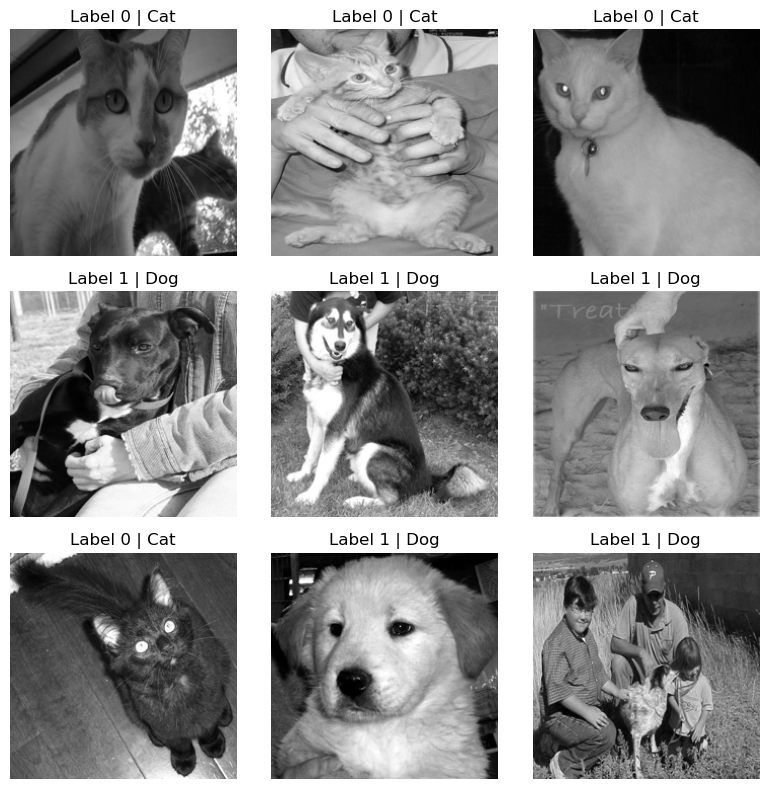

In [44]:
# Let'see some images and their labels

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axs = axs.flatten() # Flatten to siplify the loop

for i in range(9):
    axs[i].imshow(X[i], cmap='gray')
    axs[i].set_title(f"Label {y[i]} | {n[y[i]]}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()


## Training

In [45]:
# Now you have to understand that the pixels are now the X so we will flatten them and feed it to the perceptron
# We used here dray scaled image for simlicity for RGB images is the same idea we will flatten the three channels 
X = [x.flatten() for x in X]

In [46]:
# but first let's split data Test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train = np.array(X_train)

In [47]:
W,b = train(X_train,y_train)

Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.83804329626618
Loss: 16.8380432

In [48]:
W.shape

(50176,)

## Testing

In [49]:
X_test_flatten = X_test
X_test = np.array([x.reshape(224,224) for x in X_test])

In [50]:
np.array(X_test_flatten).shape

(40, 50176)

In [51]:
X_test.shape

(40, 224, 224)

In [52]:
predictions = predict(X_test_flatten,W,b)

In [53]:
pred_label = [ [1, np.round(i*100,2)] if i > 0.5  else [0,np.round((1 - i)*100,2)] for i in predictions]

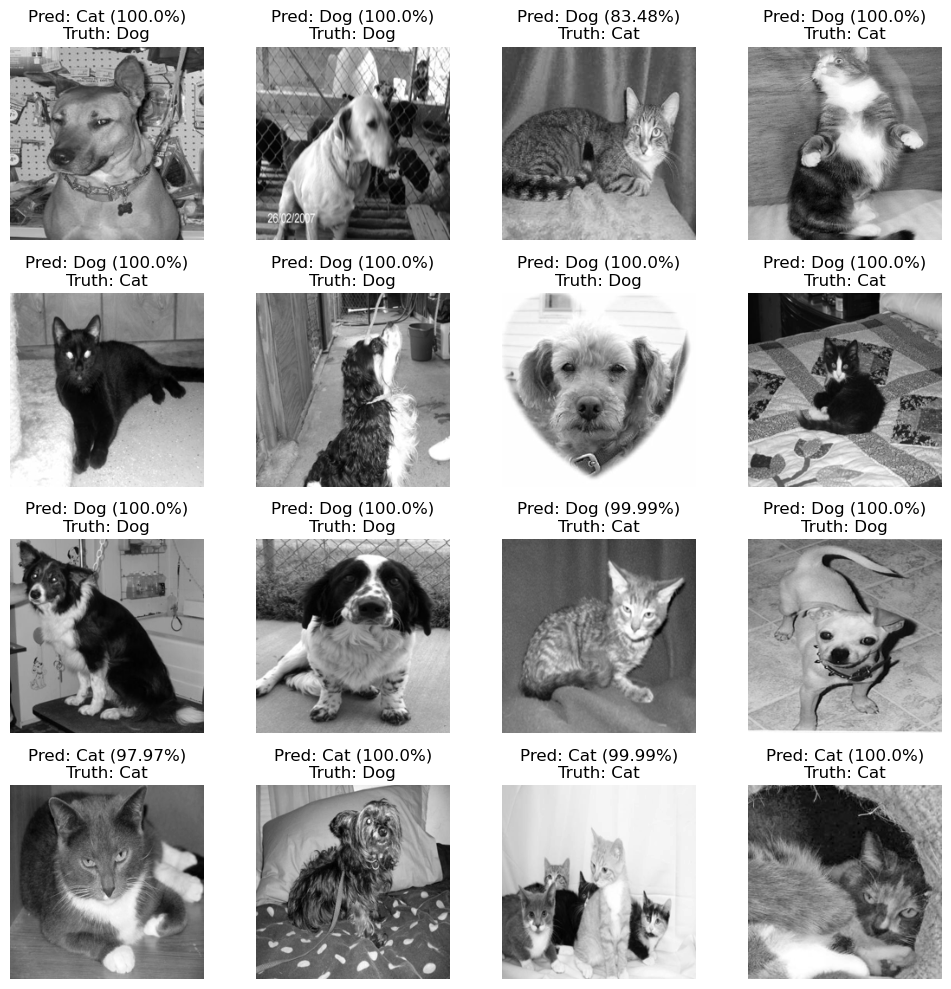

In [54]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
axs = axs.flatten() # Flatten to siplify the loop

for i in range(16):
    axs[i].imshow(X_test[i], cmap='gray')
    axs[i].set_title(f"Pred: {n[pred_label[i][0]]} ({pred_label[i][1]}%)\nTruth: {n[y_test[i]]}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()
